In [2]:
import matplotlib.pyplot as plt
import numpy as np
import huffmancodec as huffc
#ponto 1
import pandas as pd
data = pd.read_excel('CarDataset.xlsx')
tableValues = data.to_numpy()
varNames = data.columns.values.tolist()


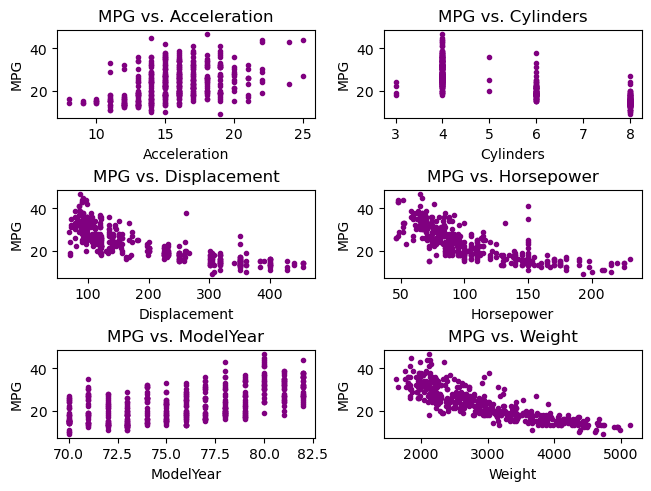

In [3]:
#ponto 2
fig, axs = plt.subplots(ncols=2, nrows=3,layout="constrained")
i = 0
h = 0
for col in range (3):
    for row in range(2):
        axs[col,row].set_ylabel('MPG')
        axs[col,row].set_xlabel(varNames[i])
        axs[col,row].set_title('MPG vs. '+ varNames[i])
        axs[col,row].scatter(tableValues[:,h],tableValues[:,6], c = 'purple', marker = '.')
        h+=1
        i+=1


In [4]:
#ponto 3
tableValues = tableValues.astype(np.uint16)
alphabet = list(range(65536))

In [5]:
#ponto 4
varFreq = [[],[],[],[],[],[],[]]
varList = [[],[],[],[],[],[],[]]
tableValuesT = tableValues.T.copy()
for i in range(len(tableValuesT)):
    tableValuesT[i] = sorted(tableValuesT[i])
for i in range(len(tableValuesT)):
        for k in range(len(tableValuesT[i])):
            count = 0
            if (tableValuesT[i][k] not in varList[i]):
                for j in range(k,len(tableValuesT[i])):
                    if (tableValuesT[i][k] == tableValuesT[i][j]):
                        count += 1
                varList[i].append(tableValuesT[i][k])
                varFreq[i].append(count)
print(varList)
print(varFreq)

[[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25], [3, 4, 5, 6, 8], [68, 70, 71, 72, 76, 78, 79, 80, 81, 83, 85, 86, 88, 89, 90, 91, 96, 97, 98, 100, 101, 104, 105, 107, 108, 110, 111, 112, 113, 114, 115, 116, 119, 120, 121, 122, 130, 131, 133, 134, 135, 140, 141, 144, 145, 146, 151, 155, 156, 163, 168, 171, 173, 181, 183, 198, 199, 200, 225, 231, 232, 250, 258, 260, 262, 267, 302, 304, 305, 307, 318, 340, 350, 351, 360, 383, 390, 400, 429, 440, 454, 455], [46, 48, 49, 52, 53, 54, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 105, 107, 108, 110, 112, 113, 115, 116, 120, 122, 125, 129, 130, 132, 133, 135, 137, 138, 139, 140, 142, 145, 148, 149, 150, 152, 153, 155, 158, 160, 165, 167, 170, 175, 180, 190, 193, 198, 200, 208, 210, 215, 220, 225, 230], [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], [1613, 1649, 1755, 1760, 1773, 1795, 1800, 18

<Figure size 640x480 with 0 Axes>

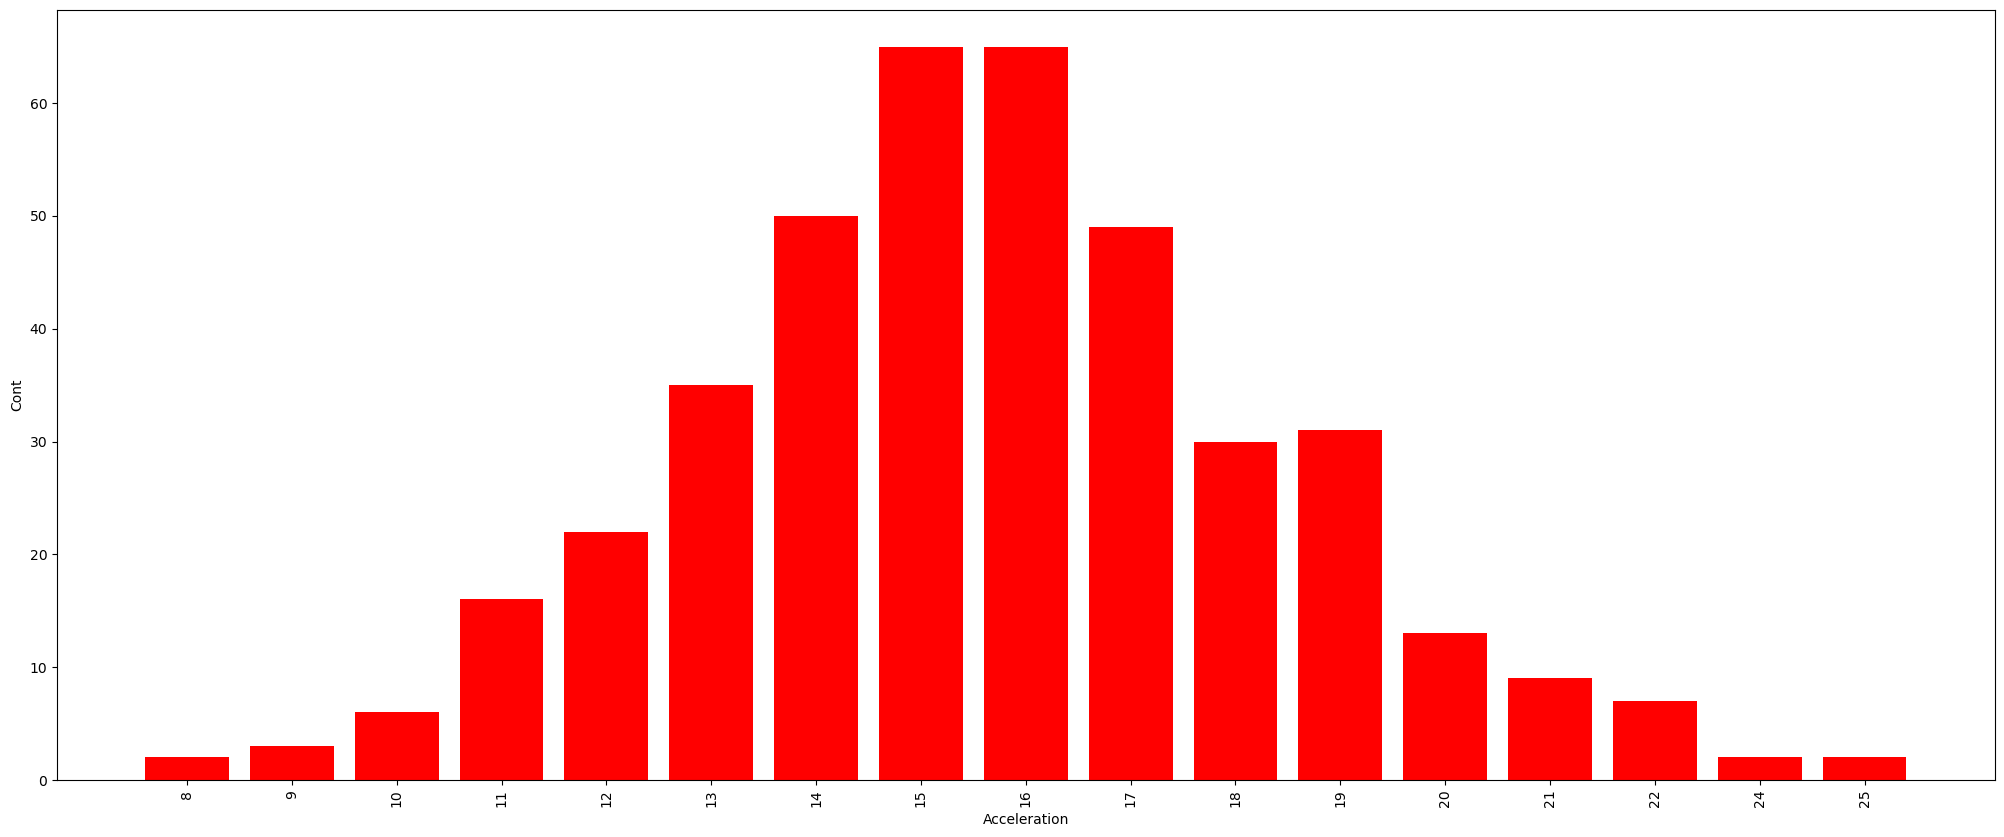

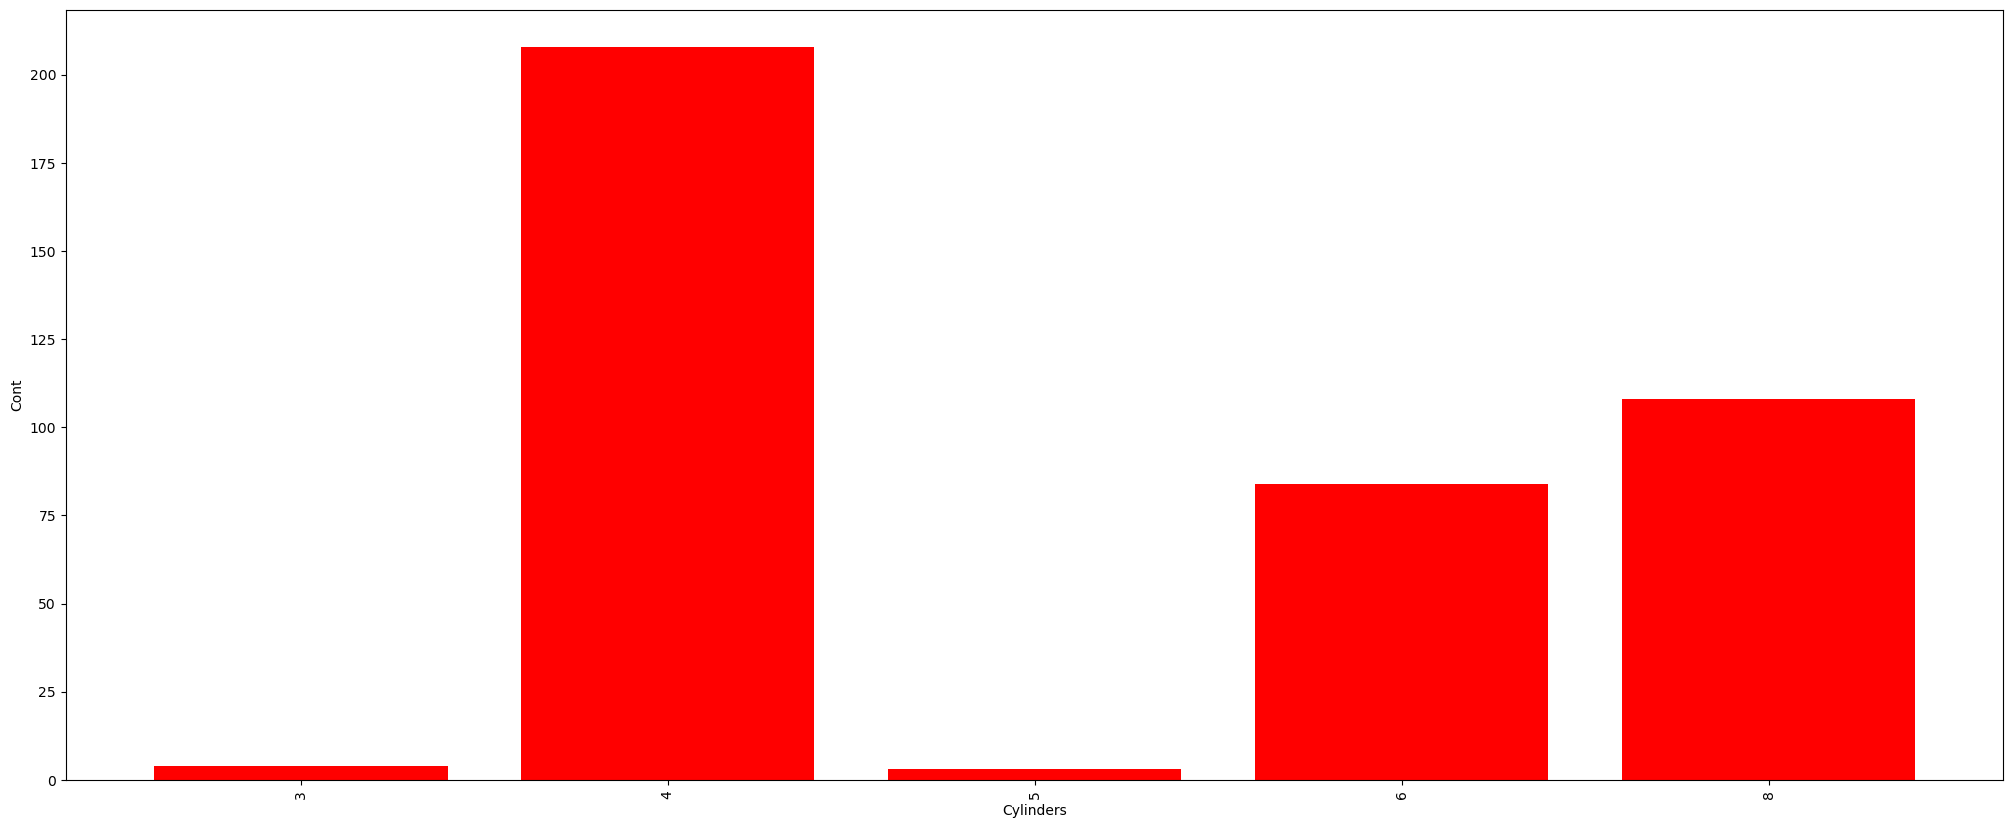

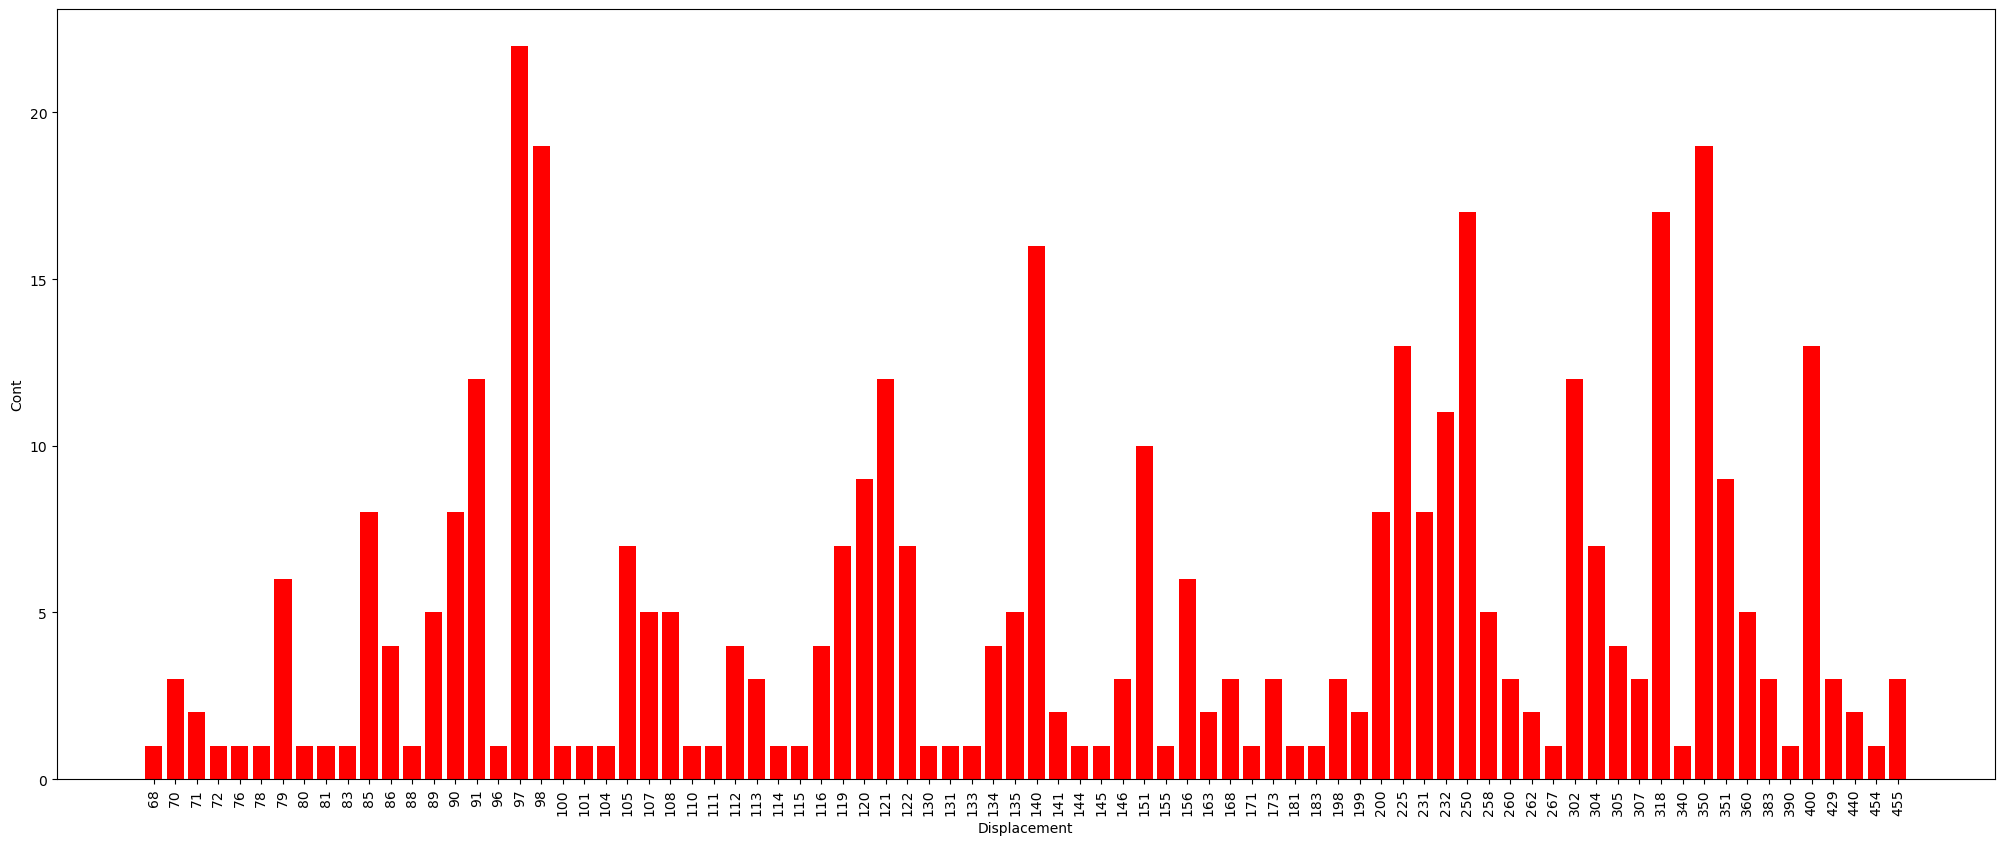

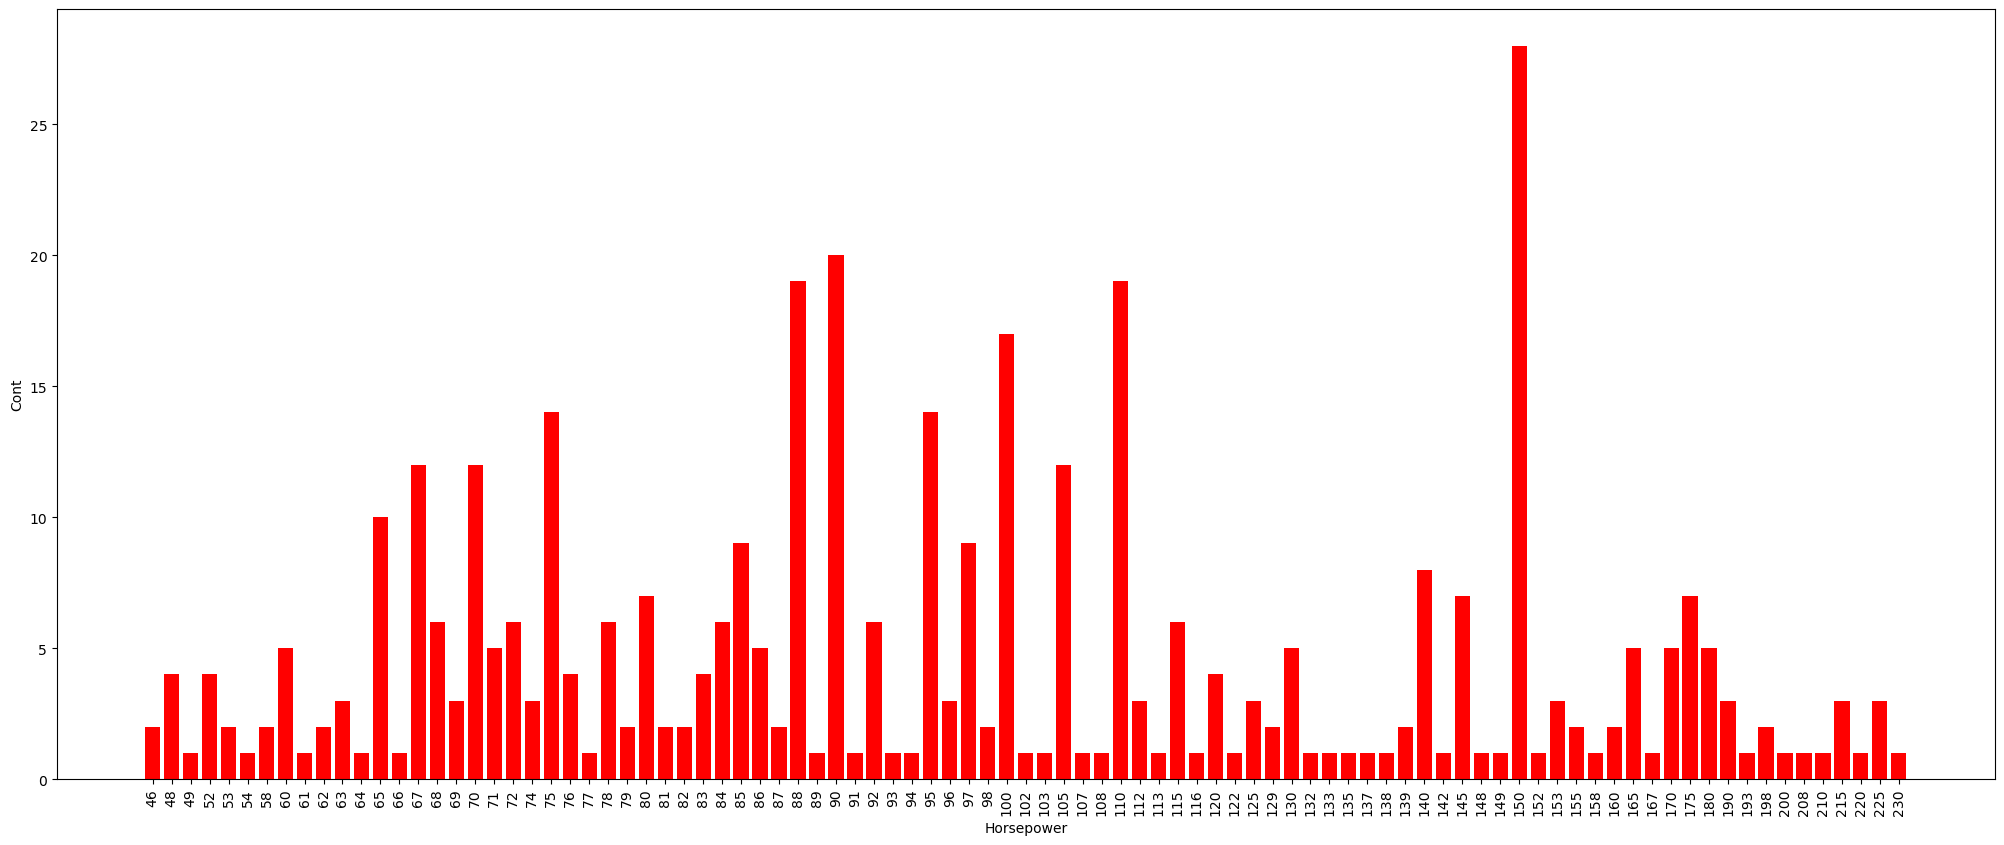

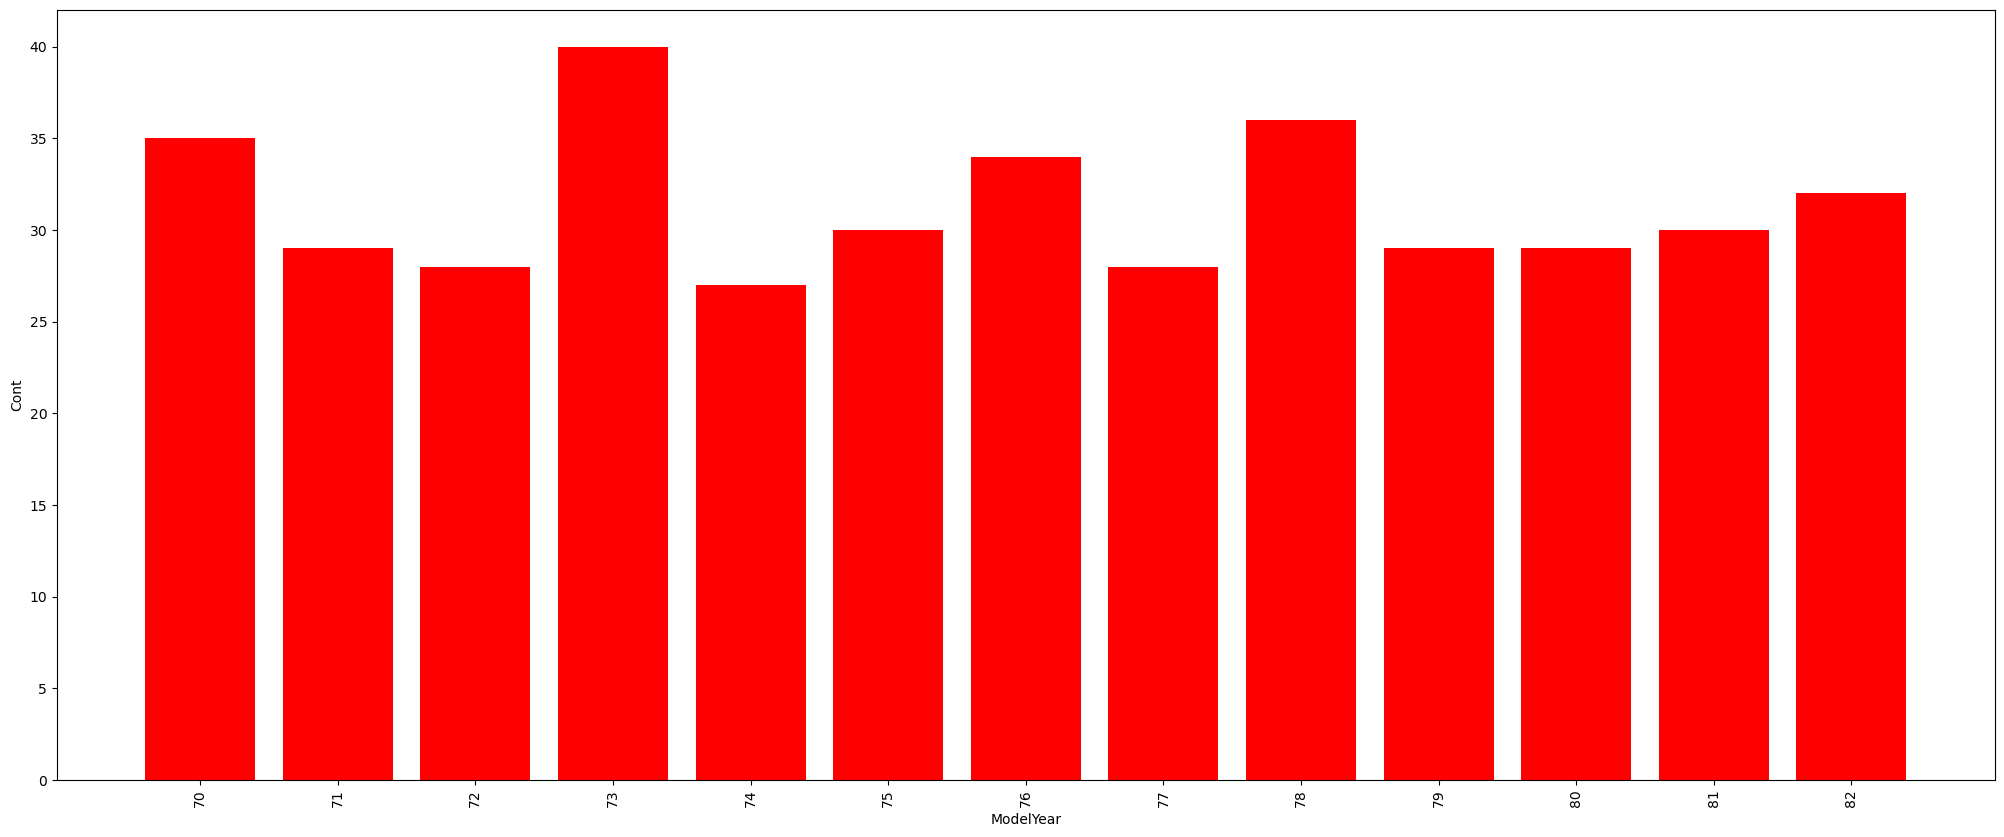

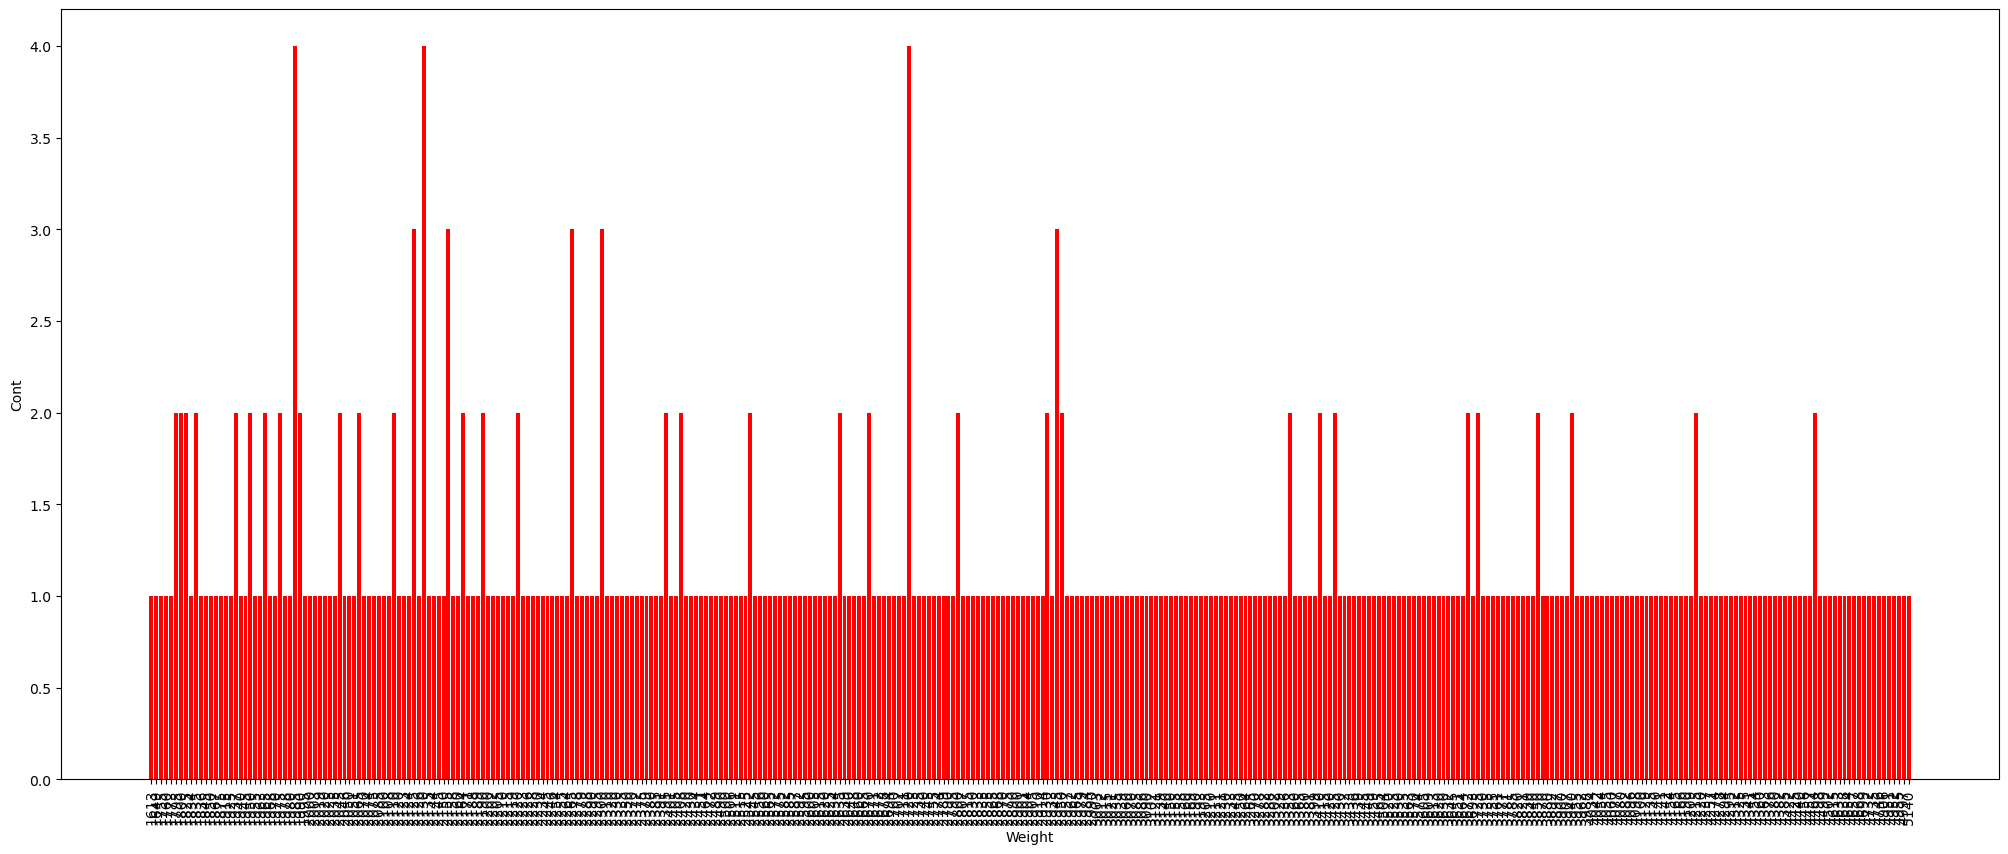

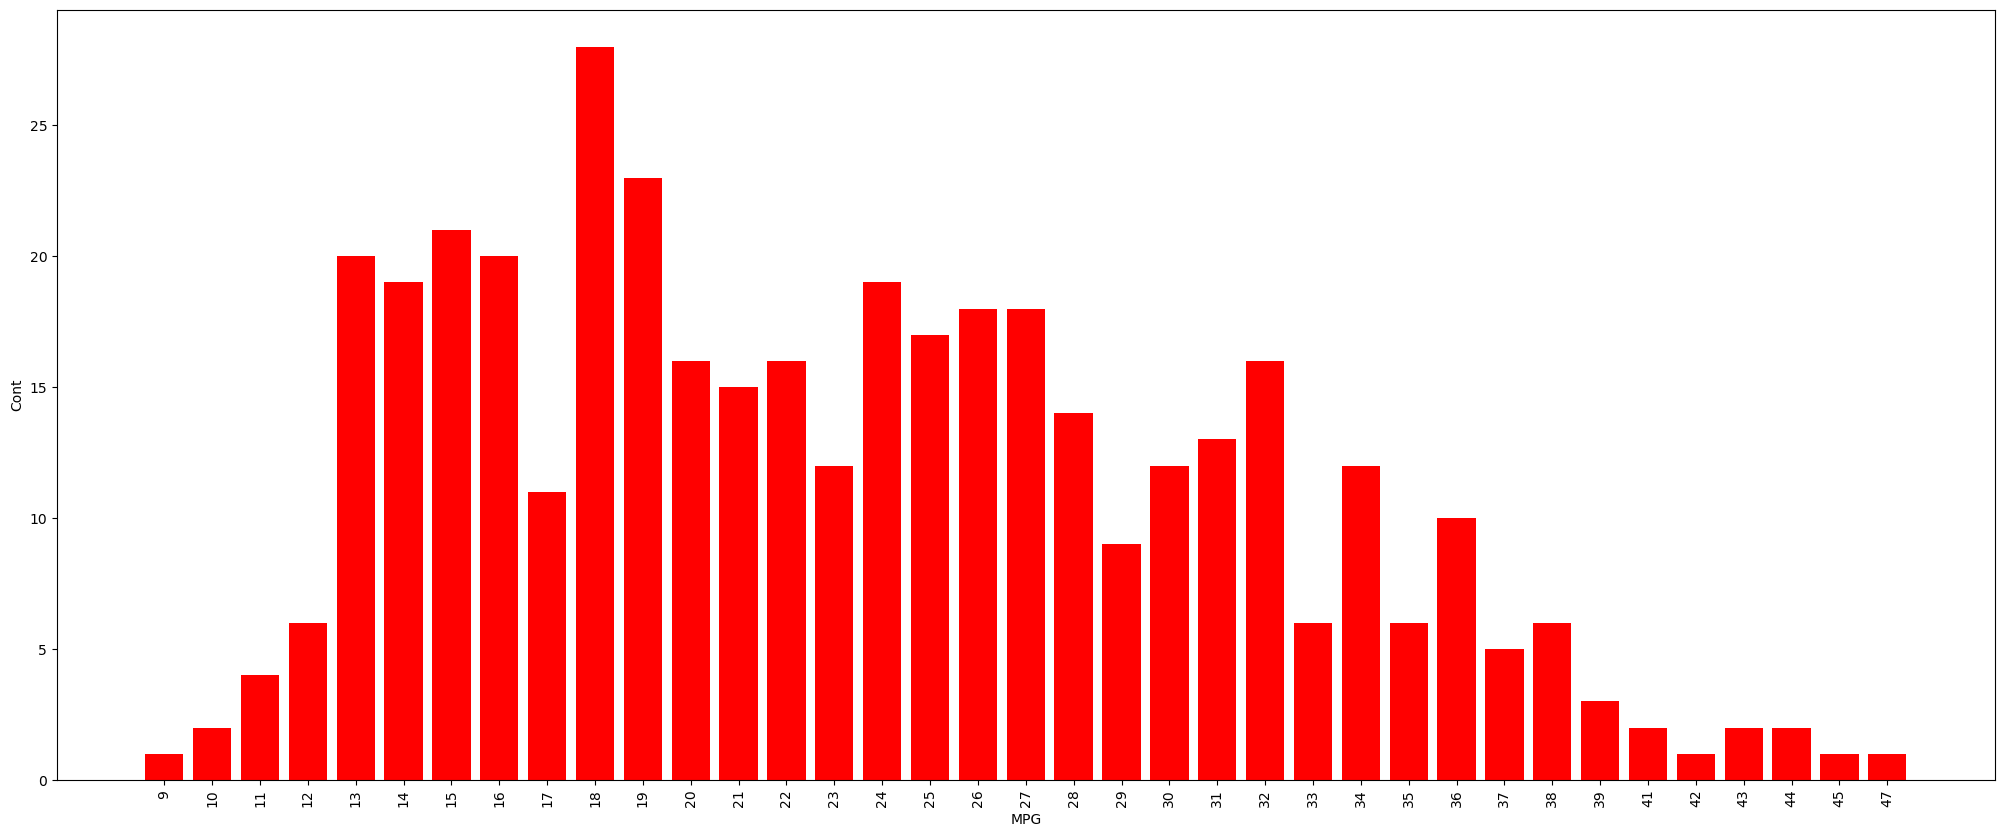

In [6]:
#ponto 5
def graph():
    plt.figure(1)
    plt.subplots_adjust(hspace=0.1)
    for i in range(len(tableValuesT)):
        sortedArray = sorted(varList[i])
        for j in range(len(sortedArray)):
            sortedArray[j] = str(sortedArray[j])
        plt.figure(figsize=(25,10))
        plt.bar(sortedArray,varFreq[i],color = "red")
        plt.xticks(rotation = 90)
        plt.xlabel(varNames[i])
        plt.ylabel("Cont")
        plt.show()
graph()

[7, 1, 9, 13, 26, 23, 21, 13, 11, 9, 35, 2, 10, 18, 5, 10, 7, 2, 4, 3, 1, 1, 13, 13, 19, 17, 10, 1, 12, 14, 17, 1, 28, 5, 3, 1, 13, 3, 2, 1]


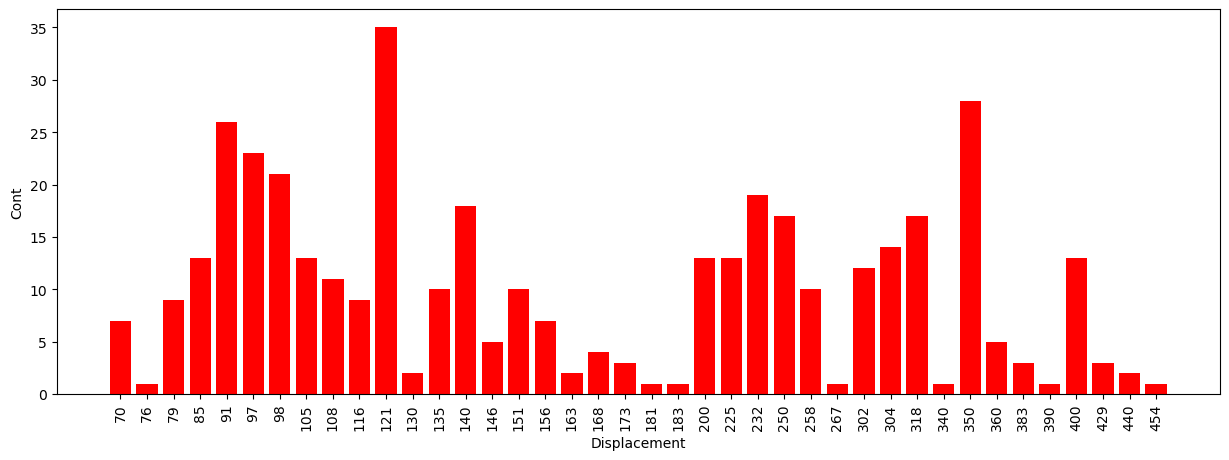

[2, 2, 5, 8, 2, 2, 12, 13, 9, 6, 15, 12, 8, 11, 10, 7, 4, 11, 4, 4, 5, 7, 8, 9, 7, 9, 4, 7, 4, 6, 8, 9, 5, 4, 5, 2, 7, 5, 5, 6, 2, 5, 5, 11, 2, 4, 3, 3, 6, 3, 4, 3, 3, 6, 3, 3, 4, 1, 2, 6, 4, 7, 2, 4, 3, 4, 5, 4, 3, 4, 3, 3, 3, 2, 2, 1, 3, 1]


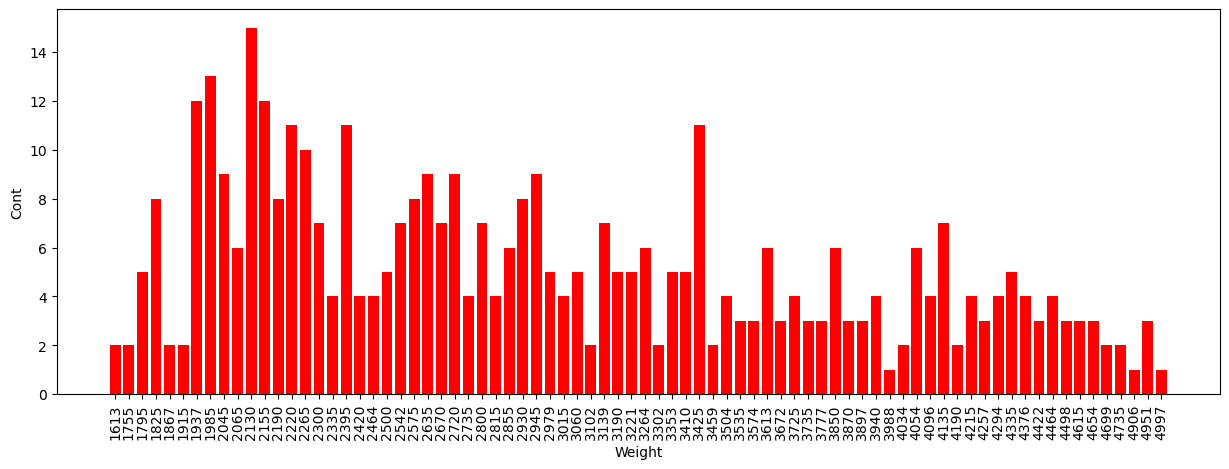

[7, 7, 7, 17, 45, 22, 19, 26, 47, 28, 20, 14, 23, 8, 5, 3, 8, 3, 12, 7, 31, 5, 3, 6, 5, 7, 5, 3, 1, 3, 2, 3, 1, 3]


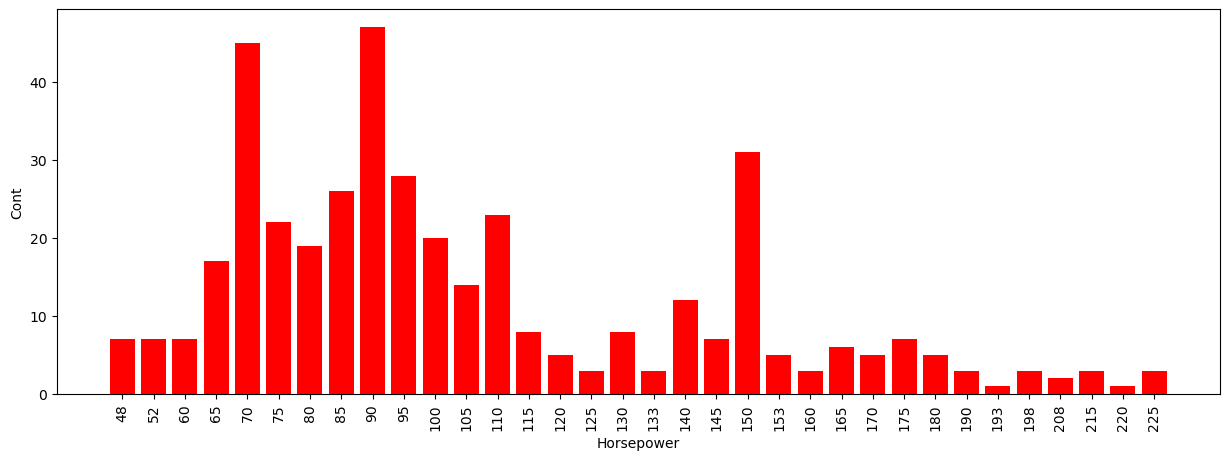

In [7]:
#ponto 6
alphabetAux = []
def binning(column, binSize):
    for i in range((max(varList[column])-min(varList[column]))//binSize):
        alphabetAux.append(min(varList[column])+binSize*i)
    for a in range(len(alphabetAux)-1):
        tableValuesAux = []
        for j in tableValuesT[column]:
            if j >= alphabetAux[a] and j < alphabetAux[a+1]:
                tableValuesAux.append(j)
        if len(tableValuesAux) != 0:
            count = 0
            num = tableValuesAux[0]
            for l in tableValuesAux:
                mostFreq = tableValuesAux.count(l)  
                if(mostFreq>count):
                    count = mostFreq
                    num = l
            for k in range(len(tableValuesT[column])):
                if tableValuesT[column][k] in tableValuesAux:
                    tableValuesT[column][k] = num
    plt.figure(figsize = (15,5))
    sortedArray = sorted(tableValuesT[column])
    freqArray = []
    tableValuesTemp = []
    mostFreq = sortedArray[0]
    count = 0
    for i in sortedArray:
        if (i == mostFreq):
            count +=1
        else:
            freqArray.append(count)
            count = 1
            tableValuesTemp.append(mostFreq)
            mostFreq = i
    for j in range(len(tableValuesTemp)):
       tableValuesTemp[j] = str(tableValuesTemp[j])
    print(freqArray)
    plt.bar(tableValuesTemp, freqArray, color = "red")
    plt.xticks(rotation = 90)
    plt.xlabel(varNames[column])
    plt.ylabel("Cont")
    plt.show()
binning(2,5)
binning(5,40)
binning(3,5)

In [8]:
#ponto 7
varEntropy = [[0],[0],[0],[0],[0],[0],[0]]
tableValuesTaux = [[0],[0],[0],[0],[0],[0],[0]]
varFreqAux = [[],[],[],[],[],[],[]]
varListAux = [[],[],[],[],[],[],[]]
for i in range(len(tableValuesT)):
    tableValuesTaux[i] = sorted(tableValuesT[i])
for i in range(len(tableValuesTaux)):
        for k in range(len(tableValuesTaux[i])):
            count = 0
            if (tableValuesTaux[i][k] not in varListAux[i]):
                for j in range(k,len(tableValuesTaux[i])):
                    if (tableValuesTaux[i][k] == tableValuesTaux[i][j]):
                        count += 1
                varListAux[i].append(tableValuesTaux[i][k])
                varFreqAux[i].append(count)

def entropy():
    for i in range(len(varFreqAux)):
        for j in range(len(varFreqAux[i])):
            varEntropy[i] += (-(varFreqAux[i][j]/407)*np.log2(varFreqAux[i][j]/407))
            
def entropyTotal():
    totalEntropy = 0
    tableValuesAux = np.array(tableValues)
    tableValuesFlat = tableValuesAux.flatten()
    uniqueValues, valueCounts = np.unique(tableValuesFlat, return_counts=True)
    probabilities = valueCounts / len(tableValuesFlat)
    for i in range(len(probabilities)):
        totalEntropy += (-(probabilities[i])*np.log2(probabilities[i]))
    return totalEntropy
entropy()
print(varEntropy)
totalEntropy=entropyTotal()
print(totalEntropy)

[array([3.49642356]), array([1.59043569]), array([4.84940337]), array([4.49887396]), array([3.69064251]), array([6.06074283]), array([4.83579962])]
7.211576568035885


In [9]:
#ponto 8
def valorMedioBitsH(data,coluna):
    codec = huffc.HuffmanCodec.from_data(data[coluna])
    symbols, lengths = codec.get_code_len()
    symbols = np.array(symbols)
    lengths = np.array(lengths, dtype=float)
    unicos, contagens = np.unique(coluna, return_counts=True)
    numero_ocorrencias_total = np.sum(contagens)
    prob = contagens / numero_ocorrencias_total
    nr_medio_bits = np.sum(prob * lengths)
    variance = np.sum(prob * (lengths - nr_medio_bits)**2)
    
    print("Symbols",symbols,"Lenght",lengths,"Variance",variance, "Número médio de bits por símbolo",nr_medio_bits)
    return  variance
valorMedioBitsH(varList, 0)
valorMedioBitsH(varList, 1)
valorMedioBitsH(varList, 2)
valorMedioBitsH(varList, 3)
valorMedioBitsH(varList, 4)
valorMedioBitsH(varList, 5)
valorMedioBitsH(varList, 6)

Symbols [ 8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25] Lenght [5. 5. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.] Variance 73790.0 Número médio de bits por símbolo 70.0
Symbols [3 4 5 6 8] Lenght [3. 3. 2. 2. 2.] Variance 462.0 Número médio de bits por símbolo 12.0
Symbols [ 68  70  71  72  76  78  79  80  81  83  85  86  88  89  90  91  96  97
  98 100 101 104 105 107 108 110 111 112 113 114 115 116 119 120 121 122
 130 131 133 134 135 140 141 144 145 146 151 155 156 163 168 171 173 181
 183 198 199 200 225 231 232 250 258 260 262 267 302 304 305 307 318 340
 350 351 360 383 390 400 429 440 454 455] Lenght [7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 7. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.
 6. 6. 6. 6. 6. 6. 6. 6. 6. 6.] Variance 22306140.0 Número médio de bits por símbolo 528.0
Symbols [ 46  48  49  52  53  54  58  60  61  62  63  64  65  66  67

1331910.0

In [10]:
#ponto 9
def correlacao(data):
    m = np.corrcoef(data, rowvar=False)
    variaveis = data.columns.tolist()
    resultados = {}
    for v, c in zip(variaveis, m[0]):
        if v!='MPG':
            resultados[v] = c

    return resultados
print(correlacao(data))

{'Acceleration': 1.0, 'Cylinders': -0.5221868742854648, 'Displacement': -0.5574353032154351, 'Horsepower': -0.6689862275247184, 'ModelYear': 0.27262139766485455, 'Weight': -0.4241349323217208}


In [11]:
def informaçao_mutua(m,indice):
    total = m.shape[0]
    pares = np.column_stack((m[:,-1], m[:,indice]))
    mpg, contMpg = np.unique(m[:,-1], return_counts = True)
    var, contPar = np.unique(m[:,indice], return_counts = True)
    im = 0
    for i in range(total):
        if np.where((pares == pares[i]).all(axis = 1))[0][0] < i:
            continue 
        valor_mpg = pares[i][0]
        valor_var = pares[i][1]
        indiceMpg = np.where(mpg == valor_mpg)[0][0] 
        indiceVar = np.where(var == valor_var)[0][0]
        prob_valor_mpg = contMpg[indiceMpg] / total
        prob_valor_var = contPar[indiceVar] / total
        prob_conj = sum(np.all(pares == pares[i], axis = 1))/total
        im +=prob_conj * np.log2( prob_conj/(prob_valor_mpg * prob_valor_var))
    
    return im
print(informaçao_mutua(tableValues,0))
print(informaçao_mutua(tableValues,1))
print(informaçao_mutua(tableValues,2))
print(informaçao_mutua(tableValues,3))
print(informaçao_mutua(tableValues,4))
print(informaçao_mutua(tableValues,5))

0.8720358370364727
0.962178641086926
2.646895257681372
2.56845025849273
1.0294236623155246
4.610309603870352


In [12]:
#ponto 11
def MPG():
    data['MPG_est'] = -5.241 + (-0.146 * data['Acceleration']) + (-0.4909 * data['Cylinders']) + (0.0026 * data['Displacement']) + (-0.0045 * data['Horsepower']) + (0.6725 * data['ModelYear'])+(-0.0059*data['Weight']) 
    print(data["MPG_est"]) 
MPG()
def MPG_no_acel():
    data['MPG_est_no_acel'] = -5.241 + (-0.4909 * data['Cylinders']) + (0.0026 * data['Displacement']) + (-0.0045 * data['Horsepower']) + (0.6725 * data['ModelYear'])+(-0.0059*data['Weight']) 
    print(data["MPG_est_no_acel"]) 
MPG_no_acel()
def MPG_no_year():
    data['MPG_est_no_year'] = -5.241 + (-0.146 * data['Acceleration']) + (-0.4909 * data['Cylinders']) + (0.0026 * data['Displacement']) + (-0.0045 * data['Horsepower']) +(-0.0059*data['Weight']) 
    print(data["MPG_est_no_year"]) 
MPG_no_year()
print(tableValuesT[6])

0      15.6944
1      14.5336
2      16.1802
3      16.0155
4      16.1069
        ...   
402    31.7416
403    32.6209
404    29.6354
405    29.0588
406    29.0588
Name: MPG_est, Length: 407, dtype: float64
0      17.4464
1      16.2856
2      17.7862
3      17.7675
4      17.7129
        ...   
402    35.3916
403    34.3729
404    32.4094
405    31.8328
406    31.8328
Name: MPG_est_no_acel, Length: 407, dtype: float64
0     -31.3806
1     -32.5414
2     -30.8948
3     -31.0595
4     -30.9681
        ...   
402   -23.4034
403   -22.5241
404   -25.5096
405   -26.0862
406   -26.0862
Name: MPG_est_no_year, Length: 407, dtype: float64
[ 9 10 10 11 11 11 11 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17
 17 17 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 1

In [21]:
#ponto 10(Implemente uma função que permita o cálculo da informação mútua (MI) entre a variável MPG e as restantes variáveis.)

def informaçao_mutua(m,indice):
    #total armazena o número total de observações no conjunto de dados.
    total = m.shape[0]
    #Cria uma matriz bidimensional (pares) empilhando as colunas correspondentes à última coluna (-1) e à coluna especificada pelo índice (indice) do conjunto de dados m.
    pares = np.column_stack((m[:,-1], m[:,indice]))
    #mpg e var são arrays contendo valores únicos nas variáveis alvo e na variável especificada, respectivamente.
    #contMpg e contPar são arrays contendo as contagens correspondentes desses valores únicos.
    mpg, contMpg = np.unique(m[:,-1], return_counts = True)
    var, contPar = np.unique(m[:,indice], return_counts = True)
    im = 0
    for i in range(total):
        #Verifica se a observação pares[i] é única até a posição i. Se não for única, continua para a próxima iteração do loop.
        if np.where((pares == pares[i]).all(axis = 1))[0][0] < i:
            continue
        #Atribui os valores da variável alvo (valor_mpg) e da variável especificada (valor_var) para a observação atual.
        valor_mpg = pares[i][0]
        valor_var = pares[i][1]
        #Obtém os índices correspondentes às variáveis únicas nas listas mpg e var.
        indiceMpg = np.where(mpg == valor_mpg)[0][0]
        indiceVar = np.where(var == valor_var)[0][0]
        #Calcula as probabilidades de ocorrência dos valores únicos nas variáveis alvo e especificada.
        prob_valor_mpg = contMpg[indiceMpg] / total
        prob_valor_var = contPar[indiceVar] / total
        #Calcula a probabilidade conjunta de ocorrência das observações únicas.
        prob_conj = sum(np.all(pares == pares[i], axis = 1))/total
        #Calcula a contribuição da informação mútua para a variável atual e acumula na variável im.
        im +=prob_conj * np.log2( prob_conj/(prob_valor_mpg * prob_valor_var))
    
    return im
print(informaçao_mutua(tableValues,0))
print(informaçao_mutua(tableValues,1))
print(informaçao_mutua(tableValues,2))
print(informaçao_mutua(tableValues,3))
print(informaçao_mutua(tableValues,4))
print(informaçao_mutua(tableValues,5))

9
6
9
7
8
6
5
5
6
10
6
5
7
15
13
9
12
18
17
16
17
12
1
1
2
0
19
16
16
18
10
7
8
10
5
5
5
3
4
9
13
10
9
14
19
21
21
22
26
18
15
16
14
11
12
6
8
2
4
3
4
10
6
4
13
12
17
19
14
19
18
5
4
3
9
7
14
3
11
13
10
12
17
7
20
11
15
11
6
17
23
7
7
4
5
20
17
22
23
17
22
6
6
7
8
7
6
9
20
14
11
14
15
20
10
13
24
16
9
7
15
14
20
16
24
11
9
9
21
23
18
10
8
27
25
8
6
7
20
16
25
21
22
13
13
33
27
24
30
27
11
12
21
22
8
23
8
8
23
25
16
18
15
25
26
28
20
18
32
29
23
28
15
22
36
31
34
33
27
21
35
31
25
24
15
18
21
30
30
26
23
28
29
21
24
25
24
19
22
16
18
14
27
28
29
27
29
27
34
23
19
0.8720358370364727
9
6
7
8
5
10
15
13
9
12
18
17
16
1
2
0
19
10
7
8
3
4
13
14
21
22
26
11
12
10
9
14
9
20
11
6
23
11
24
15
27
25
13
33
30
10
11
16
14
15
28
20
18
32
29
36
31
34
27
35
24
15
22
16
18
29
0.962178641086926
9
6
9
7
8
6
5
5
5
6
10
6
6
6
5
7
6
15
13
9
12
18
17
16
15
16
17
12
1
1
2
0
19
16
16
10
7
8
10
9
5
5
5
5
3
4
9
13
9
14
19
21
21
22
26
17
14
11
12
4
6
8
2
3
10
6
4
4
9
13
12
17
13
19
14
19
5
5
3
4
4
3
4
9
7
14
2
3
